In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.stats import chi2
import os.path as path
import wget

In [2]:
file ="Minimos.dat"
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

In [23]:
data=np.loadtxt(Path_)
x=data[:,0]
y=data[:,1]

N=len(x)

sigma=np.array([1e-2 for i in range(N)])
sigma,N


(array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]),
 20)

$$A_{mxn}=\text{m:columnas, n:filas}$$

$$\vec{x}^{*}=\mathbb{A}^T\vec{b}(\mathbb{A}^T\mathbb{A})^{-1}$$

Si sobreajusto, $\vec{d}\to 0$

In [24]:
def GetFit(x,y,grado):
    
    DataSize=x.shape[0]
    
    b=y
    
    A=np.ones((DataSize,grado+1))

    for i in range(1,grado+1):
        A[:,i]=x**i
    
    AT=np.dot(A.T,A)
    bT= A.T @b #np.dot(A.T,b)
    
    xsol=np.linalg.solve(AT,bT)
    
    return xsol

In [25]:
parametros=GetFit(x,y,2)
parametros

array([1.22132054, 6.09075205, 2.9565874 ])

In [26]:
def GetModel(x,p):
    
    y=0
    
    for n in range(len(p)):
        y+=p[n]*x**n
        
    return y

In [27]:
x_var = sym.Symbol("x",real=True)
t=GetModel(x_var,parametros)

t

2.9565874017739*x**2 + 6.09075204636184*x + 1.22132053617134

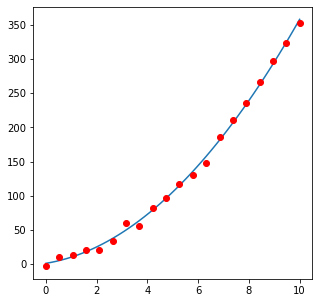

In [28]:
t = np.linspace(np.min(x),np.max(x),50)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(x,y,yerr=sigma,fmt='o',color='r')
ax.plot(t,GetModel(t,parametros))

In [29]:
def GetChi2(x,y,sigma,p,reducido=True):
    
    df= (len(x)-len(p)-1)
    if not reducido:
        x2=np.sum(((y-GetModel(x,p))/sigma)**2)
        return x2
    else:
        x2=np.sum(((y-GetModel(x,p))/sigma)**2)/df
        return x2
    

In [30]:
GetChi2(x,y,sigma,parametros)

345945.8064493112

In [31]:
Vector_Chi2=np.array([])
nparam=18

for i in range(1,nparam):
    
    param=GetFit(x,y,i)
    Chi2=GetChi2(x,y,sigma,param)
    Vector_Chi2=np.append(Vector_Chi2,Chi2)
print(Vector_Chi2)

[7252571.86794415  345945.80644931  363191.65761176  335574.27381048
  356838.86358246  366414.01196803  332999.02631287  364929.41386255
  403674.39851713  454094.38194607  517418.80313732  625284.51680604
  655199.91041436  789942.50752869 1052070.70537983 1570281.94450419
 3056658.97015211]


ValueError: x and y must be the same size

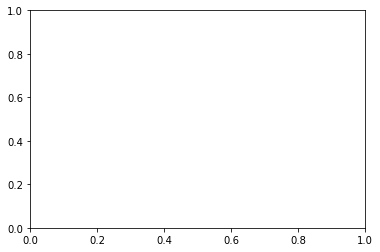

In [32]:
plt.scatter(np.arange(2,nparam,1),np.min(Vector_Chi2)/Vector_Chi2)